<a href="https://colab.research.google.com/github/Shibli-Nomani/Deep-Learing-Exercise/blob/main/skin_cancer_ham10000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Essential Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import cv2
import os
import glob
from tqdm import tqdm



from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, MaxPooling2D, AveragePooling2D, Flatten, Dense
import tensorflow as tf
from keras.layers.advanced_activations import LeakyReLU

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


from warnings import filterwarnings
from PIL import Image



# Loading Dataset

In [ ]:
rgb_data =pd.read_csv('../input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv') 

rgb_data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


# Data Preprocessing

In [ ]:
trainSet, testSet = train_test_split(rgb_data, test_size=0.20, stratify=rgb_data["label"], shuffle=True, random_state=42)


In [ ]:
print("trainSet:",trainSet.shape)
print("testSet:",testSet.shape)

print(trainSet["label"].value_counts())
print(testSet["label"].value_counts())

trainSet: (8012, 2353)
testSet: (2003, 2353)
4    5364
6     890
2     879
1     411
0     262
5     114
3      92
Name: label, dtype: int64
4    1341
6     223
2     220
1     103
0      65
5      28
3      23
Name: label, dtype: int64


In [ ]:
class_dict={

    'Actinic keratoses':0,
    'Basal cell carcinoma':1,
    'Pigmented Benign keratosis':2,
    'Dermatofibroma':3,
    'Melanocytic nevi': 4,
    'Vascular lesions': 5,
    'Melanoma': 6
}

In [ ]:
trainDataset= trainSet.copy()
trainDataset

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
8275,218,150,159,217,152,168,216,156,173,226,...,223,161,168,221,160,165,216,152,150,4
9695,151,122,121,155,127,124,164,138,137,162,...,117,84,81,140,104,98,142,110,109,0
3050,231,168,187,234,168,189,233,166,188,235,...,223,170,182,222,171,181,221,172,181,4
6928,176,138,148,176,137,146,176,138,145,178,...,173,137,146,175,136,146,175,135,145,4
8330,243,183,216,245,181,211,248,184,218,251,...,245,201,240,243,202,251,236,194,237,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,178,143,150,183,150,157,189,157,164,194,...,198,164,178,192,159,172,188,153,165,4
2345,204,175,186,199,171,180,196,167,178,200,...,213,178,191,212,178,191,212,177,190,5
1065,246,170,163,248,171,162,243,162,148,242,...,236,177,163,230,171,158,225,167,157,2
1321,155,123,128,176,140,145,181,146,156,178,...,138,106,100,84,59,58,40,22,27,6


In [ ]:
trainDataset["label"].value_counts()

4    5364
6     890
2     879
1     411
0     262
5     114
3      92
Name: label, dtype: int64

# Data Resampling 

In [ ]:
from imblearn.over_sampling import SMOTE
X, y = trainDataset.drop("label", axis=1), trainDataset["label"]

oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

print(X.shape)

print(y.value_counts())

print("classes of sample after resampling")

from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100

	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

(37548, 2352)
4    5364
0    5364
1    5364
6    5364
2    5364
3    5364
5    5364
Name: label, dtype: int64
classes of sample after resampling
Class=4, n=5364 (14.286%)
Class=0, n=5364 (14.286%)
Class=1, n=5364 (14.286%)
Class=6, n=5364 (14.286%)
Class=2, n=5364 (14.286%)
Class=3, n=5364 (14.286%)
Class=5, n=5364 (14.286%)


In [ ]:
X_training, X_valid,y_training, y_valid = train_test_split(X,y, test_size=0.30, random_state=42)

print("classes of sample after resampling for training")
from collections import Counter
counter = Counter(y_training)
for k,v in counter.items():
	per = v / len(y_training) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

print("training shape:",X_training.shape)

print("validation shape:", X_valid.shape)

print("classes of sample after resampling for validation")
from collections import Counter
counter = Counter(y_valid)
for k,v in counter.items():
	per = v / len(y_valid) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

classes of sample after resampling for training
Class=0, n=3766 (14.329%)
Class=1, n=3812 (14.504%)
Class=5, n=3745 (14.249%)
Class=3, n=3762 (14.313%)
Class=2, n=3724 (14.169%)
Class=4, n=3715 (14.135%)
Class=6, n=3759 (14.302%)
training shape: (26283, 2352)
validation shape: (11265, 2352)
classes of sample after resampling for validation
Class=4, n=1649 (14.638%)
Class=5, n=1619 (14.372%)
Class=2, n=1640 (14.558%)
Class=3, n=1602 (14.221%)
Class=1, n=1552 (13.777%)
Class=6, n=1605 (14.248%)
Class=0, n=1598 (14.186%)


# Data Reshaping

In [ ]:
TX=X_training.copy()
t = TX.to_numpy()
trainX=np.reshape(t,(26283, 28, 28, 3))
trainY=y_training.to_numpy()

VX=X_valid.copy()
v = VX.to_numpy()
valX=np.reshape(v,(11265, 28, 28, 3))
valY=y_valid.to_numpy()

# Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                  rotation_range = 90,
                                  zoom_range=0.45,
                                  horizontal_flip=True,
                                  brightness_range = (0.2, 1.5),
                                  fill_mode='reflect',
                                  height_shift_range=[-1, 0, +1]
                                  )

#val_datagen = ImageDataGenerator (rescale = 1/255.0)
test_datagen = ImageDataGenerator (rescale = 1/255.0)


train_generator = train_datagen.flow(trainX, trainY, 
                                     batch_size=64, 
                                    )

val_generator = train_datagen.flow(valX, valY, 
                                     batch_size=32, 
                                   )
#test_generator = test_datagen.flow(X_test, y_test, 
                                   #batch_size=64
                                   #)

# Build Model AlexNet 

In [ ]:
model4 =Sequential()

#Input Layer/Convolution Layer
model4.add(Conv2D(96, kernel_size= (11,11), strides=4, padding ="same", activation="relu", input_shape=(28,28,3)))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding ="same", strides=2))

#hidden layer
model4.add(Conv2D(128, kernel_size=(5,5), padding ="same", activation="relu"))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(3,3), strides=2))

model4.add(Conv2D(256, kernel_size=(3,3), padding ="same", activation="relu"))
model4.add(BatchNormalization())

model4.add(Conv2D(256, kernel_size=(3,3), padding ="same", activation="relu"))
model4.add(BatchNormalization())

model4.add(Conv2D(256, kernel_size=(3,3), padding ="same", activation="relu"))
model4.add(BatchNormalization())

model4.add(MaxPooling2D(pool_size=(3,3), padding ="same", strides=2))

#Flatten Layer
model4.add(Flatten())

#Connecting or output layer
model4.add(Dense(4096, activation="relu"))

model4.add(Dense(496, activation="relu"))

model4.add(Dense(7, activation="softmax"))


# Compile and Callback

In [ ]:
#loss for categorical value and adam perform best
model4.compile(loss='sparse_categorical_crossentropy',
              optimizer ="SGD",
              metrics=["accuracy"])

In [ ]:
#.h5 = Hierarchical Data Format Ver. 5 file, verbose =1, to see execution
tensorboard= TensorBoard(log_dir="logs")
checkpoint= ModelCheckpoint("alexnet0709.h5",
                           monitor="val_accuracy", verbose=1,
                           mode="auto", save_best_only=True)
#monitor: quantity to be monitored.     
#factor: factor by which the learning rate will be reduced. 
#patience: number of epochs with no improvement after which learning rate will be reduced.     
#verbose: int. 0: quiet, 1: update messages.
#min_delta: early stopping of epochs
#cooldown: number of epochs to wait before resuming normal operation after
reduce_lr=ReduceLROnPlateau(monitor="val_accuracy",
                           factor=0.3,
                           patience=5,verbose=1,
                           mode="auto",min_delta=0.010)

2022-09-17 13:37:14.340088: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-17 13:37:14.340204: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-09-17 13:37:14.479025: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-17 13:37:14.479209: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


# Pepare Model

In [ ]:
history = model4.fit(train_generator,
                   validation_data=val_generator,
                   epochs=80, verbose=1,
                   batch_size=128,
                   callbacks =[tensorboard, checkpoint, reduce_lr])

Epoch 1/80
  2/411 [..............................] - ETA: 1:18 - loss: 1.9878 - accuracy: 0.1484

2022-09-17 13:37:19.163140: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-09-17 13:37:19.163208: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  3/411 [..............................] - ETA: 1:24 - loss: 1.9853 - accuracy: 0.1562

2022-09-17 13:37:19.384170: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-17 13:37:19.385270: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-09-17 13:37:19.516059: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 197 callback api events and 194 activity events. 
2022-09-17 13:37:19.522230: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-09-17 13:37:19.528277: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_09_17_13_37_19

2022-09-17 13:37:19.533290: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_09_17_13_37_19/c0c330545cc7.trace.json.gz
2022-09-17 13:37:19.542831: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plug

411/411 [==============================] - 32s 76ms/step - loss: 1.6497 - accuracy: 0.3351 - val_loss: 1.7319 - val_accuracy: 0.3142

Epoch 00001: val_accuracy improved from -inf to 0.31425, saving model to alexnet0709.h5
Epoch 2/80
411/411 [==============================] - 30s 73ms/step - loss: 1.4139 - accuracy: 0.4377 - val_loss: 1.7422 - val_accuracy: 0.3277

Epoch 00002: val_accuracy improved from 0.31425 to 0.32774, saving model to alexnet0709.h5
Epoch 3/80
411/411 [==============================] - 30s 72ms/step - loss: 1.2991 - accuracy: 0.4879 - val_loss: 1.8046 - val_accuracy: 0.3293

Epoch 00003: val_accuracy improved from 0.32774 to 0.32934, saving model to alexnet0709.h5
Epoch 4/80
411/411 [==============================] - 30s 72ms/step - loss: 1.2252 - accuracy: 0.5172 - val_loss: 1.3004 - val_accuracy: 0.4762

Epoch 00004: val_accuracy improved from 0.32934 to 0.47617, saving model to alexnet0709.h5
Epoch 5/80
411/411 [==============================] - 29s 72ms/step - 

# Visualization

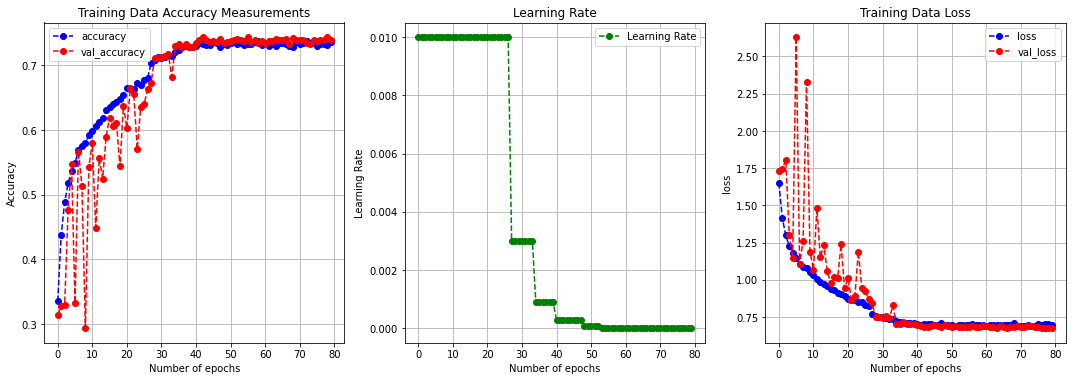

In [ ]:
def accuracy_lr_loss_plot (history):
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot(231)
    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(232)
    plt.plot(history.history['lr'], 'go--', label="Learning Rate")
    plt.title("Learning Rate")
    plt.xlabel("Number of epochs")
    plt.ylabel("Learning Rate")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    plt.subplot(233)
    plt.plot(history.history["loss"], "bo--", label="loss")
    plt.plot(history.history["val_loss"], "ro--", label = "val_loss")
    plt.title("Training Data Loss")
    plt.xlabel("Number of epochs")
    plt.ylabel("loss")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()
accuracy_lr_loss_plot(history)

In [ ]:
#loaded_model = tf.keras.models.load_model('../input/alexnet-50epochs-h5/alexnet.h5')

# Model Evaluation with Validation

In [ ]:
#loss= model4.evaluate(trainX)
#loss

2022-09-17 11:03:55.874203: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 494540928 exceeds 10% of free system memory.
2022-09-17 11:03:56.439031: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 494540928 exceeds 10% of free system memory.


822/822 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
prediction = model4.predict(valX)

prediction

array([[0.000000e+00, 0.000000e+00, 9.282695e-10, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 3.171354e-01, ..., 6.828646e-01,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [ ]:
predicted = np.argmax(prediction, axis=1)
predicted 

array([4, 2, 2, ..., 2, 2, 4])

In [ ]:
print(classification_report(valY, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1598
           1       0.00      0.00      0.00      1552
           2       0.15      0.97      0.26      1640
           3       0.03      0.00      0.01      1602
           4       0.31      0.12      0.17      1649
           5       0.00      0.00      0.00      1619
           6       0.00      0.00      0.00      1605

    accuracy                           0.16     11265
   macro avg       0.07      0.16      0.06     11265
weighted avg       0.07      0.16      0.06     11265



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix with Validation

In [ ]:
cm2 = confusion_matrix(valY, predicted)

cm2

array([[   0,    0, 1595,    0,    3,    0,    0],
       [   0,    2, 1522,    0,   28,    0,    0],
       [   0,    0, 1543,    0,   97,    0,    0],
       [   0,    0, 1594,    0,    8,    0,    0],
       [   0,    0, 1402,    0,  247,    0,    0],
       [   0,    0, 1438,    0,  181,    0,    0],
       [   0,    0, 1253,    0,  352,    0,    0]])

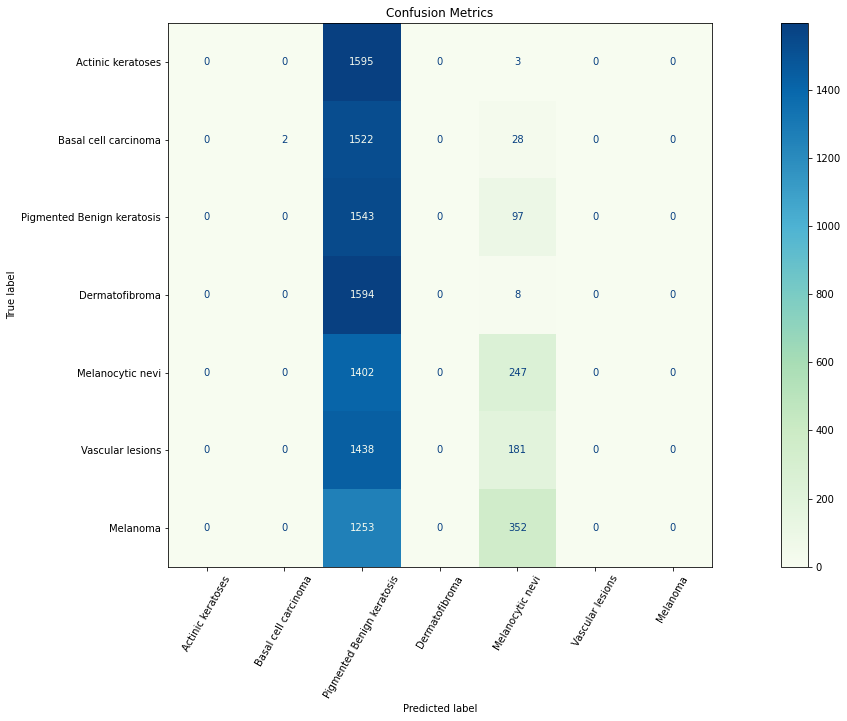

In [ ]:
display_cm2 = ConfusionMatrixDisplay(cm2, display_labels=class_dict)
fig, ax = plt.subplots(figsize=(25,10)) 
display_cm2.plot(cmap='GnBu',ax=ax,xticks_rotation=60)
plt.title("Confusion Metrics")
plt.show()

# ROC and AUC of Valid Dataset

In [ ]:
valY

array([4, 5, 2, ..., 3, 0, 5])

In [ ]:
predicted

array([4, 2, 2, ..., 2, 2, 4])

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr_val, tpr_val, thresholds_val = roc_curve(valY, predicted, pos_label=4)
auc_val = auc(fpr_val, tpr_val)
auc_val

0.5401965177806547

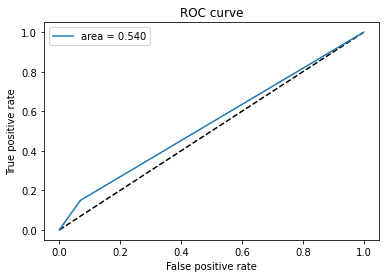

In [ ]:
plt.figure(4)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_val, tpr_val, label='area = {:.3f}'.format(auc_val))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Test Data Preprocessing and Model Predict

In [ ]:
te=testSet.copy()
te=testSet.drop("label", axis=1)
t=te.to_numpy()
testX=np.reshape(t,(2003, 28, 28, 3))

testY=testSet["label"].to_numpy()

X_ts=(testX*1.0)/255

In [ ]:
pred = model4.predict(X_ts)

pred

array([[3.58258910e-03, 1.31721675e-01, 2.08720878e-01, ...,
        9.34194122e-03, 5.01236718e-05, 1.77879427e-02],
       [5.23834955e-03, 9.59934771e-01, 1.30393391e-03, ...,
        8.63409135e-04, 1.75807031e-03, 1.40740082e-03],
       [3.25359851e-02, 1.96460728e-03, 4.83943671e-01, ...,
        4.05920863e-01, 1.11103718e-05, 7.49806538e-02],
       ...,
       [8.13889578e-02, 8.90972540e-02, 6.74633265e-01, ...,
        1.02902405e-01, 1.61827600e-04, 5.12551665e-02],
       [6.07535951e-02, 2.27724433e-01, 5.58449924e-01, ...,
        3.52150165e-02, 9.81806534e-06, 4.80768010e-02],
       [3.87449376e-02, 2.54592253e-03, 1.35942936e-01, ...,
        6.79798126e-01, 1.56090653e-04, 1.42765462e-01]], dtype=float32)

In [ ]:
preds = np.argmax(pred, axis=1)
preds 

array([3, 1, 2, ..., 2, 2, 4])

In [ ]:
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       0.15      0.18      0.17        65
           1       0.13      0.77      0.22       103
           2       0.23      0.57      0.33       220
           3       0.18      0.39      0.25        23
           4       0.93      0.28      0.43      1341
           5       0.31      0.82      0.45        28
           6       0.30      0.30      0.30       223

    accuracy                           0.34      2003
   macro avg       0.32      0.47      0.30      2003
weighted avg       0.70      0.34      0.38      2003



# Confusion Matrix for Test Data

In [ ]:
cm3 = confusion_matrix(testY, preds)

cm3

array([[ 12,  27,  20,   4,   0,   0,   2],
       [  0,  79,   8,  10,   1,   3,   2],
       [  8,  57, 125,   2,  10,   8,  10],
       [  1,   8,   4,   9,   0,   1,   0],
       [ 47, 435, 292,  19, 370,  38, 140],
       [  0,   2,   0,   0,   1,  23,   2],
       [ 11,  21, 100,   6,  17,   1,  67]])

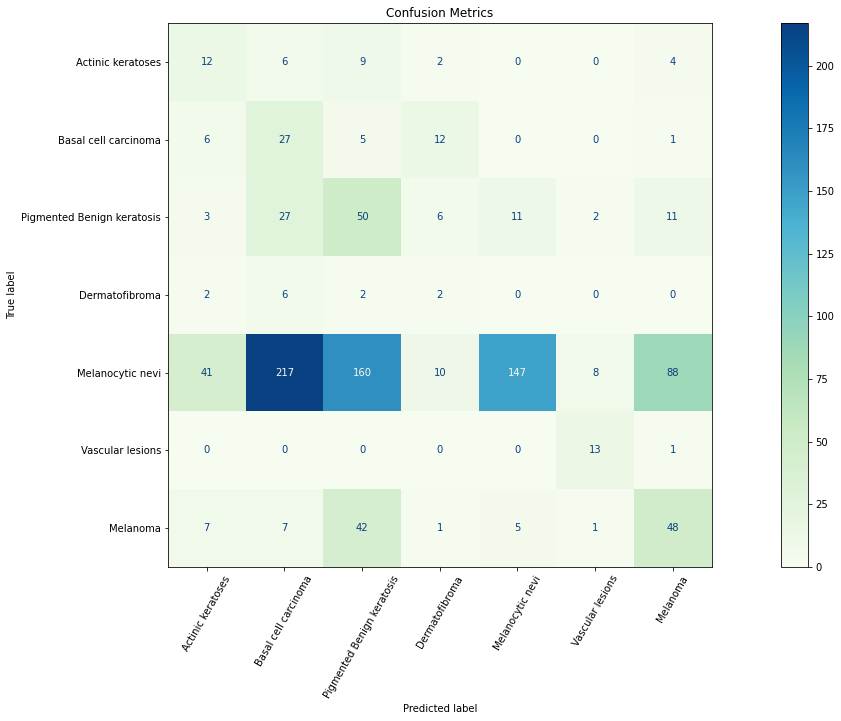

In [ ]:
display_cm3 = ConfusionMatrixDisplay(cm3, display_labels=class_dict)
fig, ax = plt.subplots(figsize=(25,10)) 
display_cm3.plot(cmap='GnBu',ax=ax,xticks_rotation=60)
plt.title("Confusion Metrics")
plt.show()

# ROC and AUC of test Dataset

In [ ]:
fpr_test, tpr_test, thresholds_test = roc_curve(testY, preds, pos_label=5)
auc_test = auc(fpr_test, tpr_test)
auc_test

0.8277305605786619

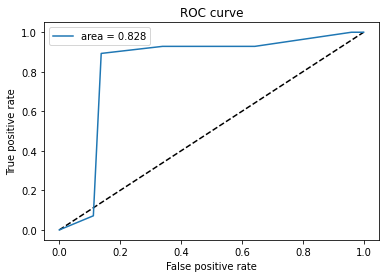

In [ ]:
plt.figure(5)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_test, tpr_test, label='area = {:.3f}'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()